In [1]:
from planetengine import utilities
from planetengine import frame
from modelscripts import isovisc_systemscript as systemscript
from modelscripts import isovisc_observerscript as observerscript
from modelscripts import sinusinglephase_initialscript as initialscript

In [11]:
model1 = frame.Frame(
    systemscript.build(f = 1.),
    observerscript.build(),
    initialscript.build(),
    )

model2 = frame.Frame(
    systemscript.build(f = 0.5),
    observerscript.build(),
    initialscript.build(pert = 0.),
    )

avTemp 0.50
modeltime 0.0E+00
Nu 1.0
step 0
surfVRMS 35804.53
VRMS 35797.28
fig



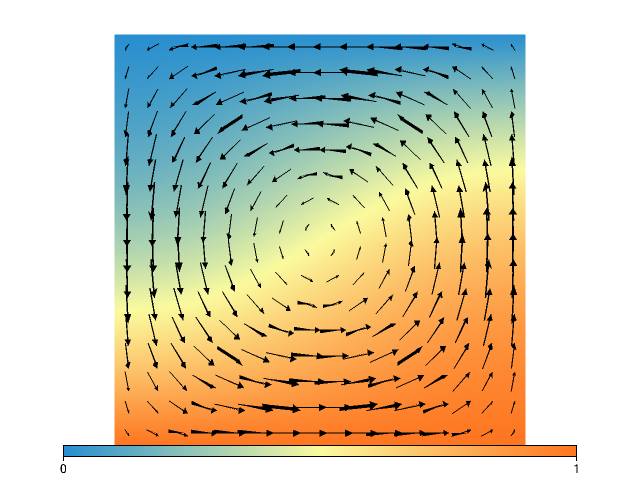

avTemp 0.44
modeltime 0.0E+00
Nu 1.0
step 0
surfVRMS 0.01
VRMS 0.01
fig



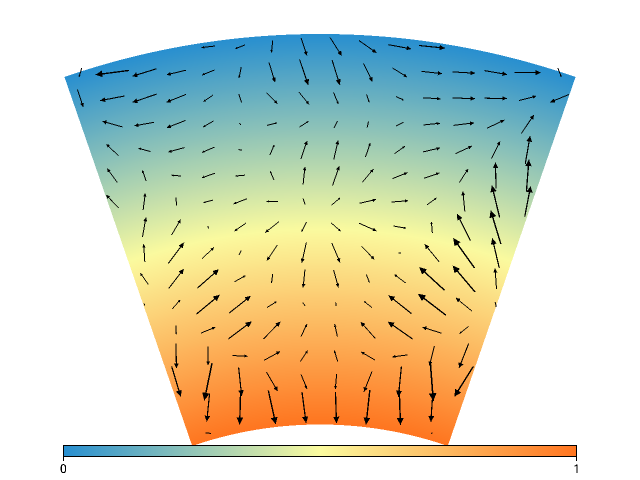

In [12]:
model1.report()
model2.report()

In [ ]:
class CoordSystems:
    #OLD - DON'T USE

    class Radial:

        def __init__(
                self,
                radialLengths = (0., 1.),
                angularExtent = (0., 360.),
                boxDims = ((0., 1.), (0., 1.)),
                origin = (0., 0.),
                xFlip = True,
                ):
            # angular extents must be given in degrees
            self.radialLengths = radialLengths
            self.angularExtent = angularExtent
            self.boxDims = boxDims
            self.origin = origin

        def recentered_coords(self, coordArray):
            recenteredCoords = coordArray - self.origin
            return recenteredCoords

        def radial_coords(self, coordArray):
            recenteredCoords = self.recentered_coords(coordArray)
            xs, ys = recenteredCoords.transpose()
            angular = np.arctan2(ys, xs) * 180. / np.pi
            radial = np.hypot(xs, ys)
            radialCoords = np.dstack((angular, radial))[0]
            return radialCoords

        def curved_box(self, coordArray):
            radInScale = self.radialLengths
            angOffset = self.angularExtent[0] // 360. * 360. 
            angInScale = tuple([x - angOffset for x in self.angularExtent])
            angOutScale, radOutScale = self.boxDims
            radialCoords = self.radial_coords(coordArray)
            xs, ys = radialCoords.transpose()
            xs = np.where(xs >= 0., xs, xs + 360.)
            xs += (angOutScale[0] - angInScale[0])
            xs *= (angOutScale[1] - angOutScale[0]) / (angInScale[1] - angInScale[0])
            xs -= (angOutScale[1])
            xs *= -1.
            xs = np.clip(xs, angOutScale[0], angOutScale[1])
            ys += radOutScale[0] - radInScale[0]
            ys *= (radOutScale[1] - radOutScale[0]) / (radInScale[1] - radInScale[0])
            ys = np.clip(ys, radOutScale[0], radOutScale[1])
            curvedBox = np.dstack([xs, ys])[0]

            return curvedBox

In [1]:
import numpy as np

class Mapper:

    def __init__(self, mesh):
        self.mesh = mesh

    def recentered_coords(self, coordArray, origin = (0., 0.)):
        recenteredCoords = coordArray - origin
        return recenteredCoords

    def radial_coords(self, coordArray):
        recenteredCoords = self.recentered_coords(coordArray)
        xs, ys = recenteredCoords.transpose()
        angular = np.arctan2(ys, xs) * 180. / np.pi
        radial = np.hypot(xs, ys)
        radialCoords = np.dstack((angular, radial))[0]
        return radialCoords

    def curved_box(
            self,
            coordArray,
            boxDims = ((0., 1.), (0., 1.)),
            origin = (0., 0.),
            xFlip = True,
            ):

        radialLengths = self.mesh.radialLengths
        angularExtent = self.mesh.angularExtent

        radInScale = radialLengths
        angOffset = angularExtent[0] // 360. * 360. 
        angInScale = tuple([x - angOffset for x in angularExtent])
        angOutScale, radOutScale = boxDims
        radialCoords = self.radial_coords(coordArray)
        xs, ys = radialCoords.transpose()
        xs = np.where(xs >= 0., xs, xs + 360.)
        xs += (angOutScale[0] - angInScale[0])
        xs *= (angOutScale[1] - angOutScale[0]) / (angInScale[1] - angInScale[0])
        xs -= (angOutScale[1])
        xs *= -1.
        xs = np.clip(xs, angOutScale[0], angOutScale[1])
        ys += radOutScale[0] - radInScale[0]
        ys *= (radOutScale[1] - radOutScale[0]) / (radInScale[1] - radInScale[0])
        ys = np.clip(ys, radOutScale[0], radOutScale[1])
        curvedBox = np.dstack([xs, ys])[0]

        return curvedBox

In [2]:
mapper = Mapper(model1.system.mesh)

NameError: name 'model1' is not defined

In [106]:
mapper.coordArray

array([[  4.99997500e-01,   9.99990000e+04],
       [  4.99997578e-01,   9.99990156e+04],
       [  4.99997656e-01,   9.99990312e+04],
       ..., 
       [ -5.00002344e-01,   9.99999687e+04],
       [ -5.00002422e-01,   9.99999844e+04],
       [ -5.00002500e-01,   1.00000000e+05]])

In [109]:
mapper.curved_box()

array([[ 1.      ,  0.      ],
       [ 1.      ,  0.015625],
       [ 1.      ,  0.03125 ],
       ..., 
       [-0.      ,  0.96875 ],
       [-0.      ,  0.984375],
       [-0.      ,  1.      ]])

In [4]:
#model3 = frame.load_frame(instanceID = "pemod_a27b81652dba39bd71e349458e75e86c", loadStep = 3)

Loading checkpoint...
Checkpoint successfully loaded.
